In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
pd.reset_option('display.float_format')
experiment = "SquareRoot"
pretty_name = "Square Root"  # Nonlinear Pendulum #Henon Heiles System #Morse Potential #Logarithmic # Inverse Cosine # Exponential # Square Root
# pd.options.display.float_format = '{:,.1f}'.format
df = pd.read_csv('/content/drive/MyDrive/SSI/Baseline v2/synthetic systems (upload)/%s_random.txt' %experiment, sep = ',',  header = None) #delim_whitespace=True,
df.columns = ["Surrogate", "Initial Conditions", "seed", "traintime", "MSE_long", "time_long", "MSE_long_naive", "time_long_naive", "MSE_within", "time_within", "MSE_within_naive", "time_within_naive", "MSE_onestep", "time_onestep", "MSE_vectorfield", "time_vectorfield"]
df = df.drop(df[df["Initial Conditions"] == 4096].index)#.drop(df[df["seed"] != 1].index)
df['MSE_long'] = df['MSE_long']*50 # made a mistake in the code, found the MSE of every single step in every trajectory instead of summing the error for one trajectory
df['MSE_long_naive'] = df['MSE_long_naive']*50 # made a mistake in the code, found the MSE of every single step in every trajectory instead of summing the error for one trajectory
# df = df.set_index("Surrogate")
# df['Surrogate'] = df.index
# df = df.drop("NN")#.drop("PINN")#.drop("GP")
df


,Surrogate,Initial Conditions,seed,traintime,MSE_long,time_long,MSE_long_naive,time_long_naive,MSE_within,time_within,MSE_within_naive,time_within_naive,MSE_onestep,time_onestep,MSE_vectorfield,time_vectorfield
0,NN,64,0,2.826338,58.340197,3.792005,60.776604,0.797848,0.092092,0.847130,0.091325,0.322683,1.159107e-04,6.976366,1.356190e-02,0.000731
1,GP,64,0,0.014382,88.879048,1.447259,90.843070,0.465444,0.033593,0.243462,0.036151,0.081162,1.610836e-06,0.351611,8.317736e-05,0.000276
2,PINN,64,0,48.864423,15.210983,3.669821,19.899072,0.958865,0.000932,0.743913,0.002608,0.163833,1.982649e-06,1.506469,1.968681e-04,0.000399
3,PIGP,64,0,0.155741,101.817249,49.371904,104.563383,2.296626,0.002984,13.159311,0.003946,0.477659,6.660728e-07,25.409234,8.185123e-05,0.000832
4,NN,128,0,3.104255,59.796115,3.875566,61.274135,0.861774,0.083236,0.988981,0.082953,0.351235,1.100418e-04,6.394962,1.286323e-02,0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,GP,512,13,0.066619,54.615680,1.616454,61.005776,0.510227,0.000969,0.264138,0.002811,0.085840,1.106546e-06,0.472659,3.512642e-05,0.000348
274,PINN,512,13,222.883801,15.022776,3.427479,18.981944,0.952091,0.000362,0.532395,0.002055,0.163726,7.083583e-08,1.200695,5.599623e-06,0.000428
275,PIGP,512,13,8.118749,91.512186,294.690774,113.624603,17.738534,0.001882,121.214527,0.004881,2.991717,3.841059e-10,228.097135,5.035638e-08,0.006061
276,NN,1024,13,2.880015,19.217644,4.176962,20.896504,0.784055,0.016220,1.073649,0.017938,0.262131,6.858840e-05,6.331802,8.196435e-03,0.000730


# Table Creation

In [ ]:
meandf = df.groupby(['Surrogate','Initial Conditions']).mean().reset_index()
meandf

,Surrogate,Initial Conditions,seed,traintime,MSE_long,time_long,MSE_long_naive,time_long_naive,MSE_within,time_within,MSE_within_naive,time_within_naive,MSE_onestep,time_onestep,MSE_vectorfield,time_vectorfield
0,GP,64,6.5,0.010628,89.285131,1.389669,87.759816,0.476025,0.023075,0.244592,0.024751,0.086398,2.133980e-06,0.429895,1.638363e-04,0.000324
1,GP,128,6.5,0.018705,87.828794,1.513240,87.975062,0.531464,0.015606,0.260418,0.019479,0.091312,1.424020e-06,0.472897,7.539913e-05,0.000346
2,GP,256,6.5,0.033770,95.248002,1.687858,93.962394,0.578368,0.021734,0.283436,0.025462,0.096724,1.272874e-06,0.510775,4.752726e-05,0.000377
3,GP,512,6.5,0.105240,82.692171,1.696568,83.302753,0.587706,0.006015,0.295232,0.008912,0.101286,1.194867e-06,0.527993,4.116538e-05,0.000399
4,GP,1024,6.5,0.365735,89.282567,1.813388,87.628121,0.647838,0.001885,0.321239,0.004383,0.112647,1.132046e-06,0.579287,3.328624e-05,0.000428
5,NN,64,6.5,3.093915,40.464306,4.057992,43.049052,0.776404,0.056759,0.904352,0.058385,0.301404,9.782913e-05,6.068574,1.129310e-02,0.000743
6,NN,128,6.5,2.722242,38.457847,3.965620,41.102163,0.772739,0.056417,0.872425,0.058145,0.284535,9.081106e-05,6.140191,1.051831e-02,0.000784
7,NN,256,6.5,2.726169,38.101495,3.994904,40.939334,0.768405,0.052821,0.859546,0.054562,0.277526,8.821375e-05,6.182768,1.025082e-02,0.000788
8,NN,512,6.5,2.787497,40.569854,3.970273,43.115669,0.750537,0.055752,0.887414,0.057129,0.280308,8.812257e-05,6.228471,1.022580e-02,0.000805
9,NN,1024,6.5,2.980372,38.495913,3.997579,41.237307,0.760334,0.054837,0.894489,0.056457,0.277490,8.793313e-05,6.011852,1.024561e-02,0.000765


In [ ]:
longintegrationdf = meandf[['Surrogate', 'Initial Conditions', 'MSE_long', 'time_long']].rename(columns={"MSE_long": "MSE", "time_long": "time"})
longintegrationdf['Surrogate'] = longintegrationdf['Surrogate'].apply(lambda x: x+"SE")
add = meandf[['Surrogate', 'Initial Conditions', 'MSE_long_naive', 'time_long_naive']].rename(columns={"MSE_long_naive": "MSE", "time_long_naive": "time"})
add['Surrogate'] = add['Surrogate'].apply(lambda x: x+"E")
longintegrationdf = longintegrationdf.append(add).reset_index()
longintegrationdf = longintegrationdf.drop(['index'],1)
# longintegrationdf = longintegrationdf[longintegrationdf['Surrogate'].str.contains('PI')]
longintegrationdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Surrogate,Initial Conditions,MSE,time
0,GPSE,64,89.285131,1.389669
1,GPSE,128,87.828794,1.513240
2,GPSE,256,95.248002,1.687858
3,GPSE,512,82.692171,1.696568
4,GPSE,1024,89.282567,1.813388
5,NNSE,64,40.464306,4.057992
6,NNSE,128,38.457847,3.965620
7,NNSE,256,38.101495,3.994904
8,NNSE,512,40.569854,3.970273
9,NNSE,1024,38.495913,3.997579


In [ ]:
withinintegrationdf = meandf[['Surrogate', 'Initial Conditions', 'MSE_within', 'time_within']].rename(columns={"MSE_within": "MSE", "time_within": "time"})
withinintegrationdf['Surrogate'] = withinintegrationdf['Surrogate'].apply(lambda x: x+"SE")
add = meandf[['Surrogate', 'Initial Conditions', 'MSE_within_naive', 'time_within_naive']].rename(columns={"MSE_within_naive": "MSE", "time_within_naive": "time"})
add['Surrogate'] = add['Surrogate'].apply(lambda x: x+"E")
withinintegrationdf = withinintegrationdf.append(add).reset_index()
withinintegrationdf = withinintegrationdf.drop(['index'],1)
# longintegrationdf = longintegrationdf[longintegrationdf['Surrogate'].str.contains('PI')]
withinintegrationdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Surrogate,Initial Conditions,MSE,time
0,GPSE,64,0.023075,0.244592
1,GPSE,128,0.015606,0.260418
2,GPSE,256,0.021734,0.283436
3,GPSE,512,0.006015,0.295232
4,GPSE,1024,0.001885,0.321239
5,NNSE,64,0.056759,0.904352
6,NNSE,128,0.056417,0.872425
7,NNSE,256,0.052821,0.859546
8,NNSE,512,0.055752,0.887414
9,NNSE,1024,0.054837,0.894489


# Plot

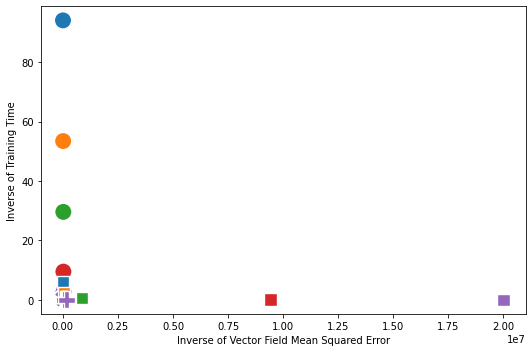

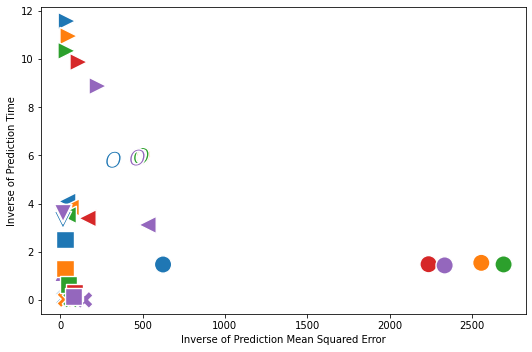

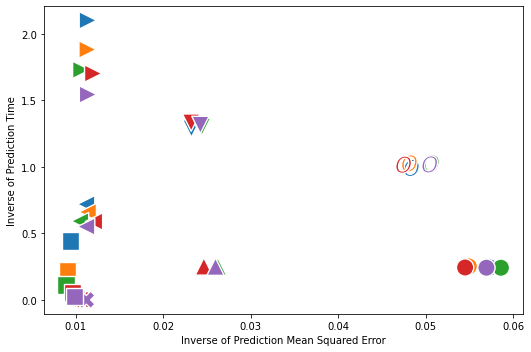

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

newdf = meandf
newdf = newdf.join(newdf[["traintime", "MSE_onestep", "MSE_long", "MSE_vectorfield", "MSE_long_naive", "time_onestep", "time_long", "time_long_naive"]].apply(lambda x: 1/x).add_prefix('inv_'))
newdf2 = longintegrationdf
newdf2 = newdf2.join(newdf2[["MSE", "time"]].apply(lambda x: 1/x).add_prefix('inv_'))
newdf3 = withinintegrationdf
newdf3 = newdf3.join(newdf3[["MSE", "time"]].apply(lambda x: 1/x).add_prefix('inv_'))

plt.figure(figsize = (7.5,5))
# plt.title("Dynamical System: %s" %pretty_name)
plt.xlabel('Inverse of Vector Field Mean Squared Error', fontsize = 10)
plt.ylabel('Inverse of Training Time', fontsize = 10)
sns.scatterplot(x = 'inv_MSE_vectorfield', y = 'inv_traintime', data = newdf, hue = 'Initial Conditions', style = 'Surrogate', palette = "tab10", s=300)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SSI/Baseline v2/synthetic systems (upload)/Plots/%s_vectorfield.png' %experiment)

plt.figure(figsize = (7.5,5))
# plt.title("Dynamical System: %s" %pretty_name)
plt.xlabel('Inverse of Prediction Mean Squared Error', fontsize = 10)
plt.ylabel('Inverse of Prediction Time', fontsize = 10)
sns.scatterplot(x = 'inv_MSE', y = 'inv_time', data = newdf3, hue = 'Initial Conditions', style = 'Surrogate', markers = [">", "s", "v", "$o$", "<", "X", "^", "o"],
                style_order =  ["GPE", "PIGPE", "NNE", "PINNE", "GPSE", "PIGPSE", "NNSE", "PINNSE"], palette = "tab10", s=300)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SSI/Baseline v2/synthetic systems (upload)/Plots/%s_allwithinmodels.png' %experiment)

plt.figure(figsize = (7.5,5))
# plt.title("Dynamical System: %s" %pretty_name)
plt.xlabel('Inverse of Prediction Mean Squared Error', fontsize = 10)
plt.ylabel('Inverse of Prediction Time', fontsize = 10)
sns.scatterplot(x = 'inv_MSE', y = 'inv_time', data = newdf2, hue = 'Initial Conditions', style = 'Surrogate', markers = [">", "s", "v", "$o$", "<", "X", "^", "o"],
                style_order =  ["GPE", "PIGPE", "NNE", "PINNE", "GPSE", "PIGPSE", "NNSE", "PINNSE"], palette = "tab10", s=300)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SSI/Baseline v2/synthetic systems (upload)/Plots/%s_allmodels.png' %experiment)




# Legend creation


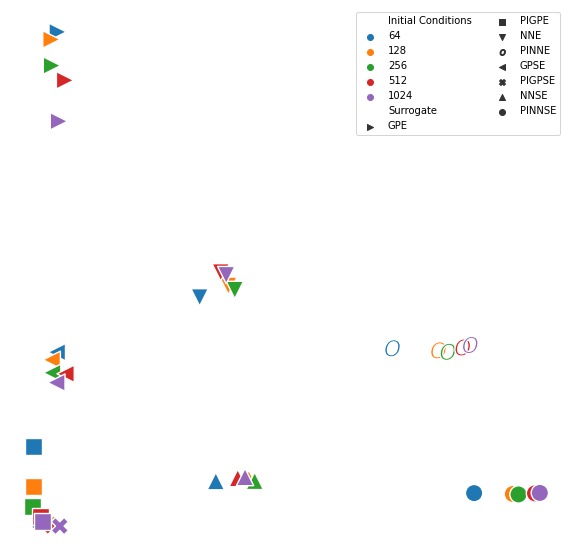

In [ ]:
import matplotlib.patches as patches
plt.figure(figsize = (10,10))
# sns.scatterplot(x = 'inv_MSE_vectorfield', y = 'inv_traintime', data = newdf, hue = 'Initial Conditions', style = 'Surrogate', palette = "tab10", s=300)
# sns.scatterplot(x = 'inv_MSE', y = 'inv_time', data = newdf2, hue = 'Initial Conditions', style = 'Surrogate', palette = "tab10", s=300)
# sns.scatterplot(x = 'inv_MSE', y = 'inv_time', data = newdf3, hue = 'Initial Conditions', style = 'Surrogate', palette = "tab10", s=300)
sns.scatterplot(x = 'inv_MSE', y = 'inv_time', data = newdf2, hue = 'Initial Conditions', style = 'Surrogate', markers = [">", "s", "v", "$o$", "<", "X", "^", "o"],
                style_order =  ["GPE", "PIGPE", "NNE", "PINNE", "GPSE", "PIGPSE", "NNSE", "PINNSE"], palette = "tab10", s=300)
plt.legend(ncol = 2, loc = "upper right") 
plt.gca().set_axis_off()
plt.show()